In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
#from model.resnet import ResNet18
from main import *
from utils import *
from custom_resnet import*

Files already downloaded and verified
Files already downloaded and verified


In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [4]:
dropout= 0.10
from custom_resnet import Model_S10
#!pip install torchsummary
from torchsummary import* 
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model_S10().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

In [5]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss, 100.*correct/len(test_loader.dataset)

In [6]:
def get_lr(optimizer):
    
    for param_group in optimizer.param_groups: 
        return param_group['lr']

  0%|          | 0/400 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.59E-02


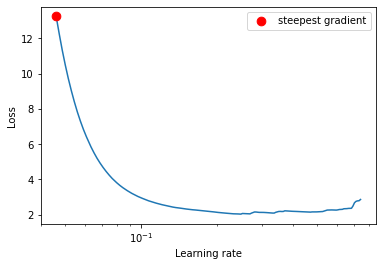

In [8]:
from  torch_lr_finder import LRFinder 

#model  = Model_S().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.04, weight_decay= 1e-4)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model,optimizer,  criterion, device= "cuda" )
lr_finder.range_test (trainloader, end_lr = 10, num_iter =400, step_mode ="exp")
lr_finder.plot()
lr_finder.reset()

In [10]:
from torch.optim.lr_scheduler import OneCycleLR
epochs= 24


Sheduler = OneCycleLR(
    optimizer, 
    max_lr=4.59E-02,
    steps_per_epoch= len(trainloader),
    epochs = epochs,
    pct_start =5/epochs,
    div_factor =100, 
    three_phase =False, 
    final_div_factor =100,
    anneal_strategy= 'linear' 
)


In [11]:
train_loss_list = []
test_loss_list = []
train_accuracy_list=[]
test_accuracy_list=[]


for epoch in range(epochs):
    print(f"Epoch {epoch}")
   
    train_loss,train_acc = train(model, device, trainloader, optimizer, epoch, criterion)
    #scheduler.step()
    test_loss,test_acc = test(model,device,  testloader)

    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    train_accuracy_list.append(train_acc)
    test_accuracy_list.append(test_acc)

  0%|                                                                                           | 0/98 [00:00<?, ?it/s]

Epoch 0


loss=1.5238759517669678 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:56<00:00,  1.74it/s]



Train set: Average loss: 0.0038, Accuracy: 18045/50000 (36.09%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.3505, Accuracy: 5073/10000 (50.73%)

Epoch 1


loss=1.3157850503921509 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:54<00:00,  1.79it/s]



Train set: Average loss: 0.0027, Accuracy: 25227/50000 (50.45%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.1351, Accuracy: 6036/10000 (60.36%)

Epoch 2


loss=1.0671796798706055 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:55<00:00,  1.77it/s]



Train set: Average loss: 0.0023, Accuracy: 29212/50000 (58.42%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.9896, Accuracy: 6608/10000 (66.08%)

Epoch 3


loss=0.8389999866485596 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:54<00:00,  1.79it/s]



Train set: Average loss: 0.0020, Accuracy: 32106/50000 (64.21%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.0505, Accuracy: 6669/10000 (66.69%)

Epoch 4


loss=0.8414093255996704 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:55<00:00,  1.76it/s]



Train set: Average loss: 0.0018, Accuracy: 34139/50000 (68.28%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7238, Accuracy: 7539/10000 (75.39%)

Epoch 5


loss=0.7480989098548889 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:56<00:00,  1.75it/s]



Train set: Average loss: 0.0016, Accuracy: 35579/50000 (71.16%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6309, Accuracy: 7841/10000 (78.41%)

Epoch 6


loss=0.7822126746177673 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:55<00:00,  1.77it/s]



Train set: Average loss: 0.0015, Accuracy: 36801/50000 (73.60%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.7210, Accuracy: 7584/10000 (75.84%)

Epoch 7


loss=0.7464777827262878 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:55<00:00,  1.77it/s]



Train set: Average loss: 0.0014, Accuracy: 37829/50000 (75.66%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6698, Accuracy: 7873/10000 (78.73%)

Epoch 8


loss=0.7298762202262878 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:55<00:00,  1.76it/s]



Train set: Average loss: 0.0013, Accuracy: 38312/50000 (76.62%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5753, Accuracy: 8094/10000 (80.94%)

Epoch 9


loss=0.6413329839706421 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:57<00:00,  1.71it/s]



Train set: Average loss: 0.0012, Accuracy: 39020/50000 (78.04%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5423, Accuracy: 8200/10000 (82.00%)

Epoch 10


loss=0.5772444605827332 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:56<00:00,  1.75it/s]



Train set: Average loss: 0.0012, Accuracy: 39547/50000 (79.09%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5075, Accuracy: 8339/10000 (83.39%)

Epoch 11


loss=0.6102855205535889 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:55<00:00,  1.76it/s]



Train set: Average loss: 0.0011, Accuracy: 40046/50000 (80.09%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4990, Accuracy: 8288/10000 (82.88%)

Epoch 12


loss=0.6206290125846863 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:56<00:00,  1.75it/s]



Train set: Average loss: 0.0011, Accuracy: 40615/50000 (81.23%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4810, Accuracy: 8427/10000 (84.27%)

Epoch 13


loss=0.5219031572341919 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:55<00:00,  1.75it/s]



Train set: Average loss: 0.0010, Accuracy: 41071/50000 (82.14%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4636, Accuracy: 8501/10000 (85.01%)

Epoch 14


loss=0.5092036128044128 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:55<00:00,  1.76it/s]



Train set: Average loss: 0.0010, Accuracy: 41285/50000 (82.57%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4947, Accuracy: 8419/10000 (84.19%)

Epoch 15


loss=0.4842441976070404 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:56<00:00,  1.75it/s]



Train set: Average loss: 0.0009, Accuracy: 41620/50000 (83.24%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5986, Accuracy: 8211/10000 (82.11%)

Epoch 16


loss=0.4614824652671814 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:54<00:00,  1.79it/s]



Train set: Average loss: 0.0009, Accuracy: 41841/50000 (83.68%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4418, Accuracy: 8599/10000 (85.99%)

Epoch 17


loss=0.43451976776123047 batch_id=97: 100%|████████████████████████████████████████████| 98/98 [00:58<00:00,  1.66it/s]



Train set: Average loss: 0.0009, Accuracy: 42279/50000 (84.56%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4352, Accuracy: 8697/10000 (86.97%)

Epoch 18


loss=0.4383581280708313 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:54<00:00,  1.79it/s]



Train set: Average loss: 0.0008, Accuracy: 42583/50000 (85.17%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4048, Accuracy: 8735/10000 (87.35%)

Epoch 19


loss=0.44946444034576416 batch_id=97: 100%|████████████████████████████████████████████| 98/98 [00:54<00:00,  1.80it/s]



Train set: Average loss: 0.0008, Accuracy: 42480/50000 (84.96%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4116, Accuracy: 8691/10000 (86.91%)

Epoch 20


loss=0.46391427516937256 batch_id=97: 100%|████████████████████████████████████████████| 98/98 [00:53<00:00,  1.82it/s]



Train set: Average loss: 0.0008, Accuracy: 42586/50000 (85.17%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4368, Accuracy: 8615/10000 (86.15%)

Epoch 21


loss=0.5125478506088257 batch_id=97: 100%|█████████████████████████████████████████████| 98/98 [00:56<00:00,  1.74it/s]



Train set: Average loss: 0.0008, Accuracy: 43134/50000 (86.27%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4840, Accuracy: 8615/10000 (86.15%)

Epoch 22


loss=0.37731805443763733 batch_id=97: 100%|████████████████████████████████████████████| 98/98 [00:58<00:00,  1.67it/s]



Train set: Average loss: 0.0008, Accuracy: 43281/50000 (86.56%)



  0%|                                                                                           | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4060, Accuracy: 8745/10000 (87.45%)

Epoch 23


loss=0.37180882692337036 batch_id=97: 100%|████████████████████████████████████████████| 98/98 [00:54<00:00,  1.79it/s]



Train set: Average loss: 0.0007, Accuracy: 43530/50000 (87.06%)


Test set: Average loss: 0.3930, Accuracy: 8822/10000 (88.22%)



Text(0.5, 1.0, 'Loss per epoch')

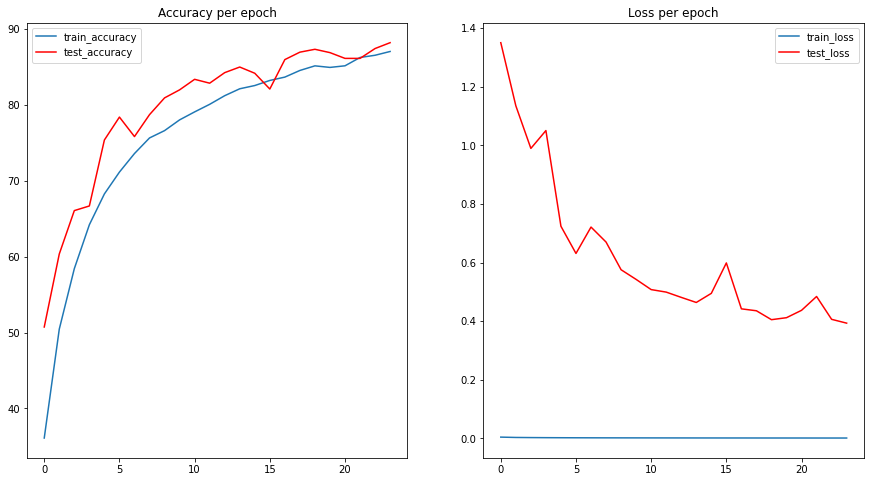

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 8]

plt.subplot(1,2, 1)

plt.plot(np.array(train_accuracy_list))
plt.plot(np.array(test_accuracy_list), 'r')
plt.legend(["train_accuracy", "test_accuracy"])
plt.title("Accuracy per epoch")

plt.subplot(1,2,2)
plt.plot(train_loss_list)
plt.plot(test_loss_list, 'r')
plt.legend(["train_loss", "test_loss"])
plt.title("Loss per epoch")

In [18]:


from pylab import *

def getWrongPredictions(model, device, val_loader):
    wrong_idx = []
    wrong_samples = []
    wrong_preds = []
    actual_values = []

    for data,target in val_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)

        wrong_idx = (pred != target.view_as(pred)).nonzero()[:, 0]
        wrong_samples.append(data[wrong_idx])
        wrong_preds.append(pred[wrong_idx])
        actual_values.append(target.view_as(pred)[wrong_idx])
    return list(zip(torch.cat(wrong_samples),torch.cat(wrong_preds),torch.cat(actual_values)))

def plotWrongPredictions(wrong_predictions):
    fig = plt.figure(figsize=(10,10))
    mean,std = (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
    for i, (sample, wrong_pred, actual_value) in enumerate(wrong_predictions[:20]):
        sample, wrong_pred, actual_value = sample.cpu().numpy(), wrong_pred.cpu(), actual_value.cpu()
        # Undo normalization
        for j in range(sample.shape[0]):
            sample[j] = (sample[j]*std[j])+mean[j]
        sample = np.transpose(sample, (1, 2, 0))
        ax = fig.add_subplot(4, 5, i+1)
        ax.axis('off')
        ax.set_title(f'actual {classes[actual_value.item()]}\npredicted {classes[wrong_pred.item()]}',fontsize=15)
        ax.imshow(sample)
    plt.show()
def imshow(img,c = "" ):    
    npimg = img.numpy()
    fig = plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)),interpolation='none')
    plt.title(c)

In [19]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 

In [20]:
train_loader, test_loader = getCifar10DataLoader() 

Files already downloaded and verified
Files already downloaded and verified


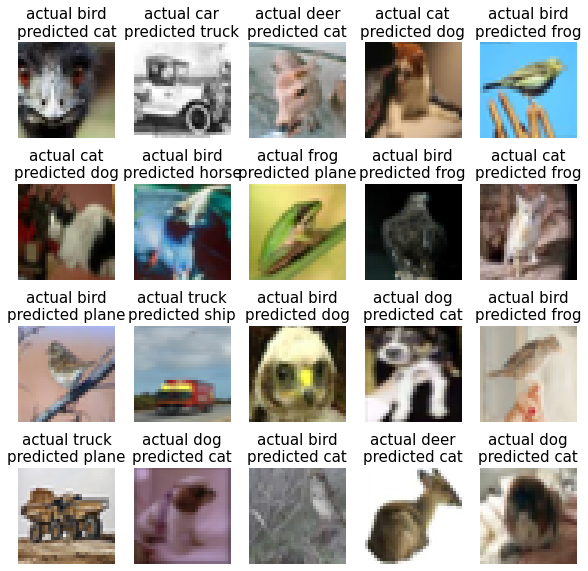

In [21]:
wp = getWrongPredictions(model, device, test_loader)
plotWrongPredictions(wp)

In [22]:

#net = net.to(device)
model.eval()
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

#classes = testset.classes
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 88 %
Accuracy of   car : 100 %
Accuracy of  bird : 87 %
Accuracy of   cat : 69 %
Accuracy of  deer : 91 %
Accuracy of   dog : 68 %
Accuracy of  frog : 84 %
Accuracy of horse : 95 %
Accuracy of  ship : 95 %
Accuracy of truck : 91 %
